In [180]:
import pandas as pd
import numpy as np
%matplotlib inline

In [181]:
titanic = pd.read_csv("titanic_2_aula.csv")

## Medidas de dispersão
#### Amplitude ou range - É a diferença entre o maior e o menor valor  do conjunto de dados

In [182]:
exemplo = [10, 11, 12, 14, 15, 16]
menor = min(exemplo)
maior = max(exemplo)
print("amplitude", maior-menor)

amplitude 6


In [183]:
a = titanic.Age.max() - titanic.Age.min()
a

79.579999999999998

In [184]:
def variancia(lista):
    n = len(lista)
    mu = np.mean(lista)
    numerador = 0
    for i in lista:
        numerador += (i - mu)**2
    return numerador/n

In [185]:
variancia([10,9,11,12,8])

2.0

Quanto menor é a variância, mais próximos os valores estão da média

In [186]:
titanic.Age.var() #mostra o quão disperso está isso

211.01912474630802

In [187]:
lista_de_exemplo = [1, 1]
np.var(lista_de_exemplo)

0.0

In [188]:
# é ZERO porque todos estão no mesmo ponto, não há dispersão

# Desvio padrão - stddev

O desvio padrão é capaz de identificar o "erro" em um conjunto de dados, caso quiséssemos substituir um dos valores
coletados pela média aritmética

In [189]:
titanic.Age.std()

14.526497332334042

In [190]:
titanic.Age.mean()

29.69911764705882

Se você somar e subtrair o std (14.53) da média do titanic.Age (29.7), 
você consegue identificar a concentração de idades

In [191]:
29.69911764705882 - 14.526497332334042

15.172620314724778

In [192]:
29.69911764705882 + 14.526497332334042

44.22561497939286

As idades de pessoas do Titanic estão concentradas de 15.17 a 44.22

# Como selecionar ou extrair uma amostra?

In [193]:
jogadas = pd.read_csv("http://bit.ly/2AHxAkX")

In [194]:
jogadas.head()

,exp
0,24
1,25
2,28
3,24
4,25


In [195]:
import seaborn as sns
jog = jogadas.exp # exp é o nome da coluna ; refere-se ao número de vezes em que a moeda caiu 'cara'

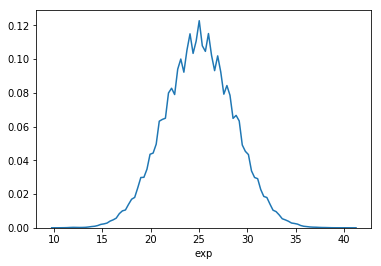

In [196]:
sns.distplot(jog, hist=False)

In [197]:
def assimetria(coluna):
    moda = coluna.mode()[0]
    mediana = coluna.median()
    media = coluna.mean()

    if (media > mediana > moda):
        return("assimetria positiva")
    elif (media < mediana < moda):
        return("assimetria negativa")
    else:
        return("simétrica")

In [198]:
assimetria(jogadas.exp)

'simétrica'

#### O pandas nos entrega uma função de amostra (sample).
#### Nela podemos passar a fração da distribuição.

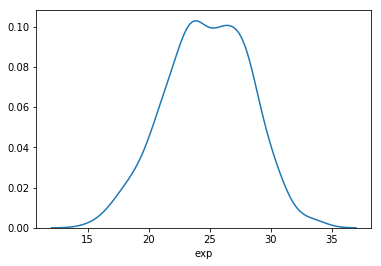

In [199]:
amostra = jog.sample(frac=0.01)
sns.distplot(amostra, hist=False)

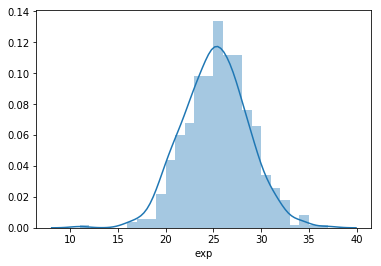

In [200]:
amostra = jog.sample(frac=0.01)
sns.distplot(amostra, hist=True) # com o histograma atrás

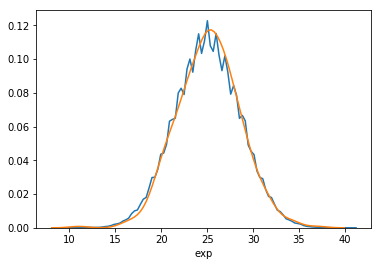

In [201]:
sns.distplot(jog, hist=False)
sns.distplot(amostra, hist=False)

In [202]:
print(jog.mean())
print(amostra.mean())

25.0216
25.168


In [203]:
print(jog.std())
print(amostra.std())

3.53677022365
3.40219427013


# Validar a amostra
## Intervalo de confianca + margem de erro
### (A largura entre a média e os valores de intervalo)

O nivel de confianca eh a frqeuncia com a qual o intervalo observado contem o parametro real de interesse quando o experimento eh repetido varias vezes. Os intervalos de confianca sao tipicamente estabelecidos no nivel de confianca de 95%.

In [204]:
from scipy import stats # biblioteca que tem funções de estatísticas


In [205]:
mu = np.mean(jogadas.exp)
sigma = np.std(jogadas.exp)

print(mu)
print(sigma)

25.0216
3.53673485577


In [206]:
stats.norm.interval(0.95, loc=mu, scale=sigma)

(18.089727059828448, 31.953472940171551)

### 95% dos valores das médias vão estar nesse intervalo. Eu tenho 95% de confiança

É mais provável que a moeda caia 'cara' de 18.089727059828448 a 31.953472940171551 vezes

Esse valor aí é aproximadamente 2 x std para cima e para baixo. Std é 3.5267

# Teste de hipotese para comparacao de amostras

Teste 'T' de Student

In [207]:
amostra1 = jogadas.exp.sample(frac=0.1)
amostra2 = jogadas.exp.sample(frac=0.4)

In [208]:
s, pvalue = stats.ttest_ind(amostra1, amostra2)

In [209]:
s

-1.6407877049318857

In [210]:
pvalue

0.10085407218032287

In [211]:
pvalue = stats.ttest_ind(amostra1, amostra2)[1] #podemos usar assim ou da forma como está na linha 57

In [212]:
if(pvalue >= 0.05):
    print("Aceito a hipotese que as medias sao iguais estatisticamente com 95% de confianca")
    print(amostra1.mean(), amostra2.mean())
else:
    print("Rejeito a hipotese que as medias sao iguais estatisticamente com 95% de confianca")
    print(amostra1.mean(), amostra2.mean())

Aceito a hipotese que as medias sao iguais estatisticamente com 95% de confianca
24.9442 25.0361


## Como verificar se uma distribuicao eh normal?


In [213]:
# Desafio: checar se a distribuicao de idades do Titanic era normal

In [214]:
titanic[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relatives,AgeRange,AgeNotNull,AgeFillNa1,AgeFillNa-1,IdadeComMedia,IdadeComMediaSexo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,adulto,22.0,22.0,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,adulto,38.0,38.0,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,adulto,26.0,26.0,26.0,26.0,26.0


In [215]:
titanic_idade1 = titanic.Age.dropna()
titanic_idade2 = titanic.Age.dropna()

titanic_pvalue = stats.ttest_ind(titanic_idade1, titanic_idade2)[1]

In [216]:
def verificador_de_normal(lista):
    z, pvalue = stats.normaltest(lista)
    if(pvalue >= 0.05):
        print("distribuicao eh normal", pvalue)
    else:
        print("nao eh normal", pvalue)

In [217]:
verificador_de_normal(titanic.Age.dropna()) # tiramos o NaN da coluna

nao eh normal 0.000117095996574


In [218]:
verificador_de_normal(jogadas.exp)

distribuicao eh normal 0.0573305970345


In [219]:
## desafio

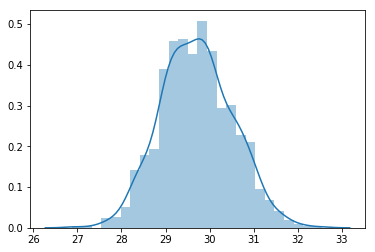

In [220]:
media_das_amostras = []
for n in range(1000):
    amostra = titanic.Age.sample(frac=0.3)
    media = amostra.mean()
    media_das_amostras.append(media)
    
sns.distplot(media_das_amostras, hist=True)

In [221]:
verificador_de_normal(media_das_amostras)

distribuicao eh normal 0.344615710693


## Distribuição exponencial

A distribuição exponencial é uma distribuicao muito utilizada na pratica para modelar tempo de falha de objetos. Por exemplo, pode ser usada para modelar o tempo que demora ate uma lampada falhar.

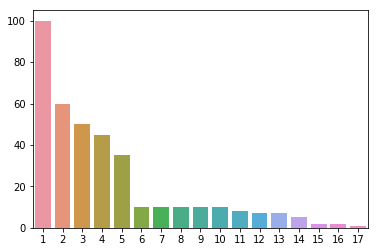

In [222]:
qtd_pessoas = [100,60,50,45,35,10,10,10,10,10,8,7,7,5,2,2,1]
tempo_de_ligacao = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

sns.barplot(tempo_de_ligacao, qtd_pessoas)

# Machine Learning

aprendizado supervisionado X aprendizado nao supervisionado X aprendizado por reforço

#passos:
    #1) get data
    #2) clean, prepare and manipulate data
    #3) train model
    #4) test data
    #5) improve

In [223]:
## Regressao logistica
### predição de valores baseada em uma série de variáveis binárias

Eh uma tecnica estatistica que tem como objetivo produzir, a partir de um dataset, ...

In [224]:
titanic_raw = pd.read_csv("titanic_2_aula.csv")
titanic_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relatives,AgeRange,AgeNotNull,AgeFillNa1,AgeFillNa-1,IdadeComMedia,IdadeComMediaSexo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,adulto,22.0,22.0,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,adulto,38.0,38.0,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,adulto,26.0,26.0,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,adulto,35.0,35.0,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,adulto,35.0,35.0,35.0,35.0,35.0


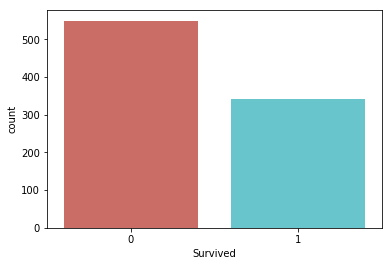

In [225]:
sns.countplot(x="Survived", data=titanic_raw, palette="hls")

In [226]:
titanic_new = titanic_raw[["Survived", "Pclass", "Sex", "Fare", "Embarked", "AgeRange"]]
titanic_new.head(3)

,Survived,Pclass,Sex,Fare,Embarked,AgeRange
0,0,3,male,7.2500,S,adulto
1,1,1,female,71.2833,C,adulto
2,1,3,female,7.9250,S,adulto


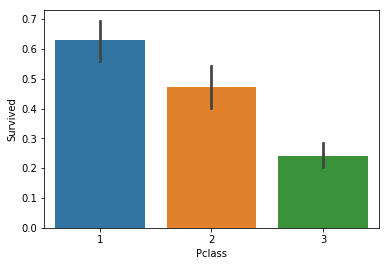

In [227]:
sns.barplot("Pclass", "Survived", data=titanic_new)

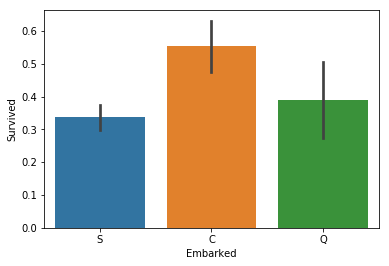

In [228]:
sns.barplot("Embarked", "Survived", data=titanic_new)

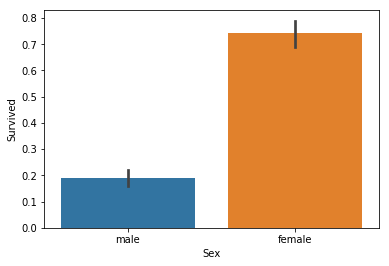

In [229]:
sns.barplot("Sex", "Survived", data=titanic_new)

In [230]:
# desafio: gere o gráfico de sobreviventes por faixa-etária

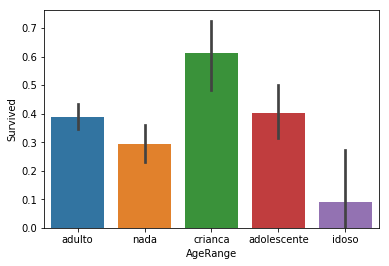

In [231]:
sns.barplot("AgeRange", "Survived", data=titanic_new)

In [232]:
titanic_new.isnull().sum()

Survived    0
Pclass      0
Sex         0
Fare        0
Embarked    2
AgeRange    0
dtype: int64

In [233]:
titanic_new["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [234]:
titanic_new["EmbarkedFillnaMax"] = titanic_new["Embarked"].fillna("S") 
#preenchemos null pela ocorrencia mais frequente da coluna
#'S' foi o mais frequente, conforme mostra a celula acima

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [235]:
titanic_new.head(3)

,Survived,Pclass,Sex,Fare,Embarked,AgeRange,EmbarkedFillnaMax
0,0,3,male,7.2500,S,adulto,S
1,1,1,female,71.2833,C,adulto,C
2,1,3,female,7.9250,S,adulto,S


In [236]:
titanic_new["EmbarkedFillnaMax"].value_counts()

S    646
C    168
Q     77
Name: EmbarkedFillnaMax, dtype: int64

In [237]:
gender = pd.get_dummies(titanic["Sex"]) #transformamos para categóricos binários
gender.head() 

# quando é mulher, aparece 1. quando não é, aparece 0.
# idem quanto aos homens

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [238]:
gender = pd.get_dummies(titanic["Sex"], drop_first=True) #queremos só a coluna Male
gender.head() 

,male
0,1
1,0
2,0
3,0
4,1


In [239]:
embark_location = pd.get_dummies(titanic_new["EmbarkedFillnaMax"])
embark_location.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [240]:
age_range = pd.get_dummies(titanic_new["AgeRange"])
age_range.head(10)

,adolescente,adulto,crianca,idoso,nada
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
5,0,0,0,0,1
6,0,1,0,0,0
7,0,0,1,0,0
8,0,1,0,0,0
9,1,0,0,0,0


In [253]:
titanic_concat = pd.concat([titanic_new, gender, embark_location, age_range], axis=1)
titanic_concat.head(3)

,Survived,Pclass,Sex,Fare,Embarked,AgeRange,EmbarkedFillnaMax,male,C,Q,S,adolescente,adulto,crianca,idoso,nada
0,0,3,male,7.2500,S,adulto,S,1,0,0,1,0,1,0,0,0
1,1,1,female,71.2833,C,adulto,C,0,1,0,0,0,1,0,0,0
2,1,3,female,7.9250,S,adulto,S,0,0,0,1,0,1,0,0,0


In [254]:
titanic_dmy = titanic_concat.drop(["Embarked", "EmbarkedFillnaMax", "Sex", "AgeRange"], axis=1)
titanic_dmy.head(10)

,Survived,Pclass,Fare,male,C,Q,S,adolescente,adulto,crianca,idoso,nada
0,0,3,7.2500,1,0,0,1,0,1,0,0,0
1,1,1,71.2833,0,1,0,0,0,1,0,0,0
2,1,3,7.9250,0,0,0,1,0,1,0,0,0
3,1,1,53.1000,0,0,0,1,0,1,0,0,0
4,0,3,8.0500,1,0,0,1,0,1,0,0,0
5,0,3,8.4583,1,0,1,0,0,0,0,0,1
6,0,1,51.8625,1,0,0,1,0,1,0,0,0
7,0,3,21.0750,1,0,0,1,0,0,1,0,0
8,1,3,11.1333,0,0,0,1,0,1,0,0,0
9,1,2,30.0708,0,1,0,0,1,0,0,0,0


In [256]:
features = ["male", "Pclass"]
x = titanic_dmy[features] # eh o conjunto de features que eu tenho
x.head()

,male,Pclass
0,1,3
1,0,1
2,0,3
3,0,1
4,1,3


In [257]:
y = titanic_dmy["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [258]:
# TREINO - aquele que será usado para gerar o nosso modelo
# TESTE - nele vamos validar se a nossa previsao foi correta

In [259]:
from sklearn.model_selection import train_test_split

In [277]:
x_treino, x_teste, y_treino, y_teste = \
    train_test_split(x, y, test_size = .3, random_state=25) 
# a contra-barra eh apenas por questao estetica
# para permitir que tudo seja visto na tela, sem o scroll para o lado    

#### separamos o nosso dataset em um parte para TESTE e outra para TREINO. aproximadamente 30% eh para TESTE.
#### SCIKIT LEARN == biblioteca que usaremos agora

In [272]:
from sklearn.linear_model import LogisticRegression

In [273]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [274]:
# acima a gente treinou o modelo

In [275]:
# agora a gente vai predizer os resultados

In [278]:
predictions = log_reg.predict(x_teste)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [280]:
## Testar a qualidade do modelo
### Métricas de qualidade

In [281]:
# Matriz de confusão
# Quanto o modelo acertou? Quanto o modelo errou? 

In [288]:
# True positives >> 140
# False negatives >> 36
# False positives >> 25
# True negatives >> 67

In [289]:
pd.crosstab(predictions, y_teste)

Survived,0,1
row_0,,
0,140,36
1,25,67


In [290]:
(140 + 67) / (140 + 67 + 25 + 36)

0.7723880597014925

O valor acima é dado por ACC >>> corretas / todas

In [291]:
from sklearn import metrics
metrics.accuracy_score(y_teste, predictions)

0.77238805970149249

In [292]:
# fim